In [70]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# choose based on run in acadia or home computer
home_dir = "/mnt/labNAS/"
# home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# add paths to metadata
# output of mean_subtract_individuals.py
for i in range(metadata.shape[0]):
    b_path = in_path+"norm_subtracted/p05_mean_subtracted/"+metadata.loc[i, 'brain']+"_p05_norm_subtracted.tif"

    metadata.loc[i,"p05_path"] = b_path

# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS"]


In [3]:
# load masks for each individually aligned brain
from time import time
start = time()
# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    area_masks = []
    print("working on", area)
    for i in range(metadata.shape[0]):
        print("\t", metadata.loc[i,"brain"])
        save_folder = in_path+"masks/"+metadata.loc[i,"brain"]+"_masks/"
        with open(save_folder+metadata.loc[i,"brain"]+"_"+area+".npy", "rb") as f:
            area_masks.append(np.load(f))
        
    mask_dict[area] = area_masks

# for area in mask_dict:
#     print(area, ": \t", len(mask_dict[area]))

end = time()
print("took", end-start, "seconds to load")

working on grey
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on CTX
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on ACAc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on au

# NO SUBTRACTION

## OMC

In [9]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [10]:
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]


In [17]:
omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,ACAc,435.94604,2635.56,OMC_MMus_220119_b0,MMus,OMC
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
63,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
64,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


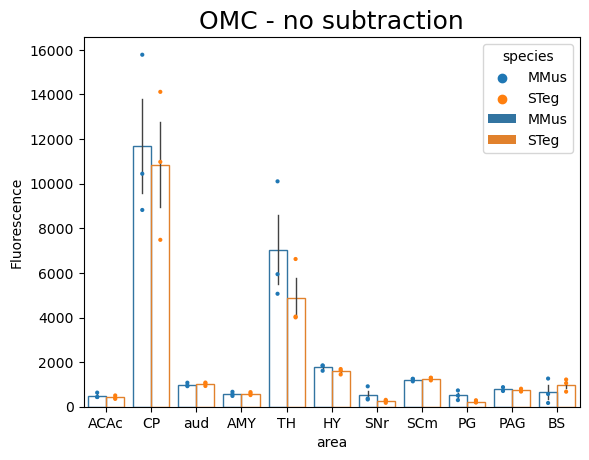

In [18]:
# make dot plot
dot_bar_plot(omc_fluor, title="OMC - no subtraction", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

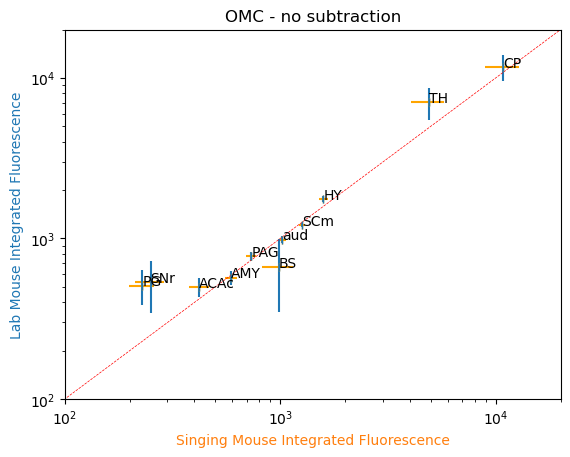

In [28]:
stvmm_area_scatter(omc_fluor, title="OMC - no subtraction", ax_limits=(100,20000))
plt.show()

## ACC

In [24]:
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")


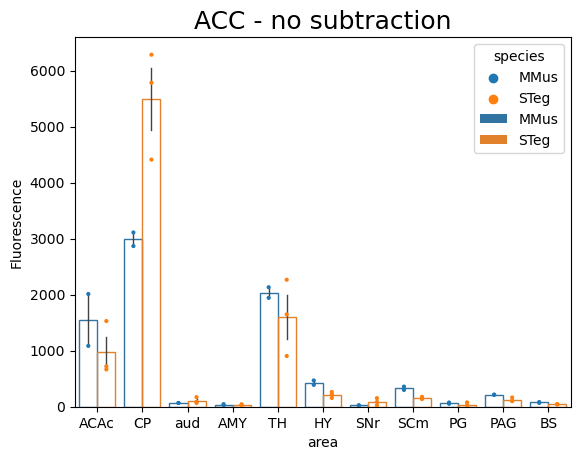

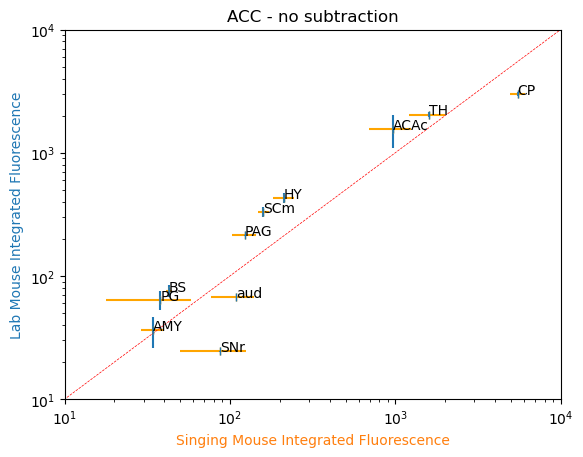

In [26]:
# make dot plot
dot_bar_plot(acc_fluor, title="ACC - no subtraction", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - no subtraction", ax_limits=(10,10000))
plt.show()

# Linear scale

In [86]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [87]:
## OMC
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
63,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
64,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


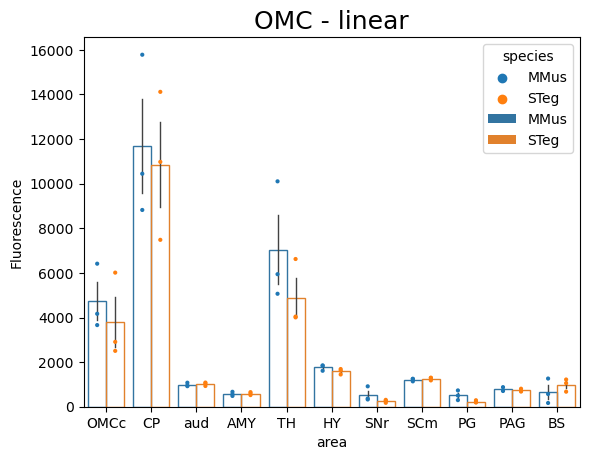

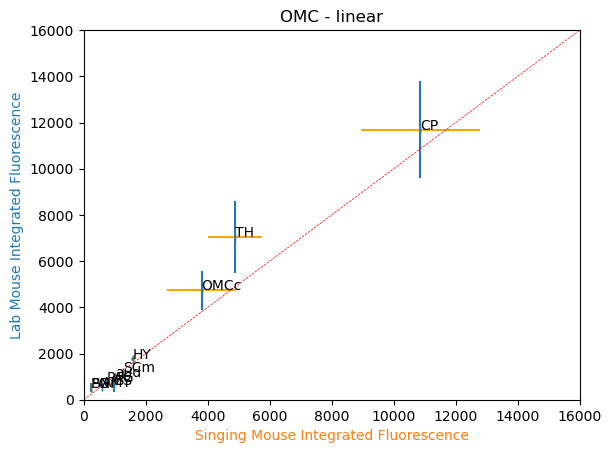

In [96]:
# make dot plot
dot_bar_plot(omc_fluor, title="OMC - linear", xaxis="area", yaxis="Fluorescence", 
             hueaxis="species")
plt.show()
stvmm_area_scatter(omc_fluor, title="OMC - linear", ax_limits=(0,16000), log=False)
plt.show()



In [97]:
## ACC
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")
acc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,ACAc,1085.89226,2857.06,ACC_MMus_230403_b1,MMus,ACC
1,CP,3110.44317,25513.74,ACC_MMus_230403_b1,MMus,ACC
2,aud,66.86299,6602.36,ACC_MMus_230403_b1,MMus,ACC
3,AMY,46.32795,4212.38,ACC_MMus_230403_b1,MMus,ACC
4,TH,1943.69694,19682.74,ACC_MMus_230403_b1,MMus,ACC
5,HY,390.38238,13412.30,ACC_MMus_230403_b1,MMus,ACC
6,SNr,24.25114,1394.58,ACC_MMus_230403_b1,MMus,ACC
7,SCm,299.76625,5931.54,ACC_MMus_230403_b1,MMus,ACC
8,PG,52.64784,827.30,ACC_MMus_230403_b1,MMus,ACC
9,PAG,216.84287,4461.40,ACC_MMus_230403_b1,MMus,ACC


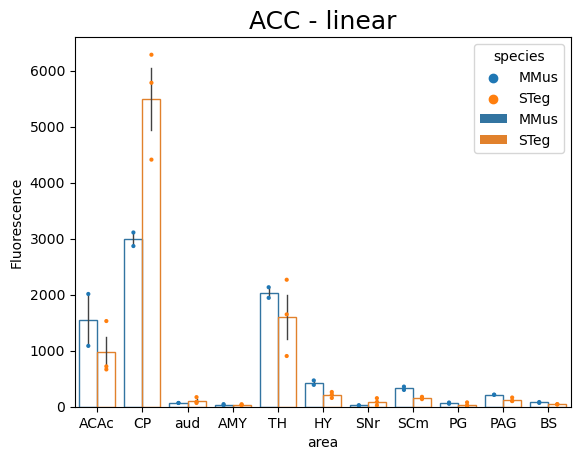

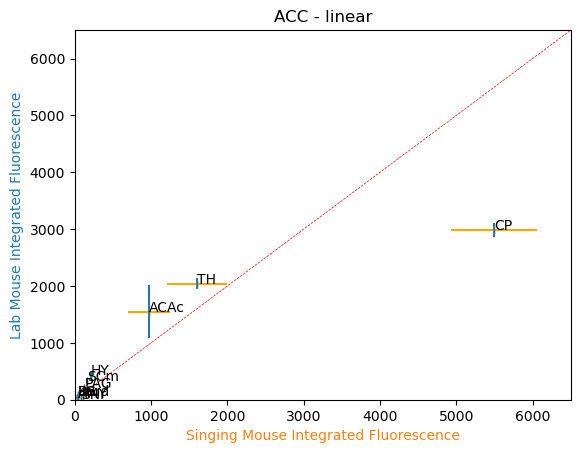

In [100]:

# make dot plot
dot_bar_plot(acc_fluor, title="ACC - linear", xaxis="area", yaxis="Fluorescence",
             hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - linear", ax_limits=(0, 6500), log=False)
plt.show()

# STD instead of SEM

In [45]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [46]:
## OMC
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
63,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
64,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


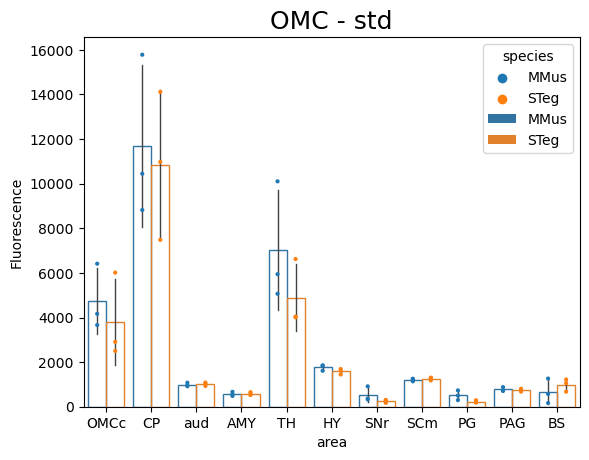

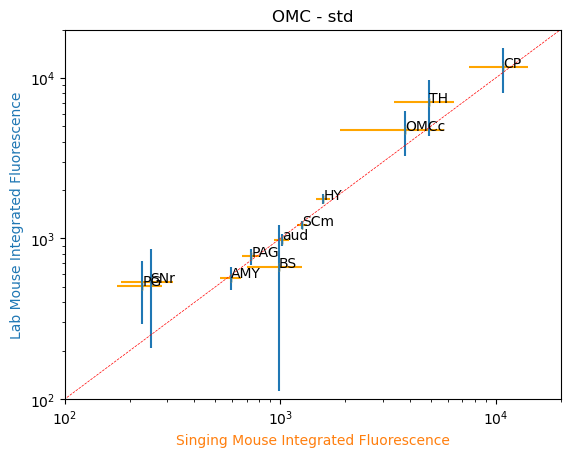

In [47]:

# make dot plot
dot_bar_plot(omc_fluor, title="OMC - std", xaxis="area", yaxis="Fluorescence", 
             hueaxis="species", errorbar="sd")
plt.show()
stvmm_area_scatter(omc_fluor, title="OMC - std", ax_limits=(100,20000), err="std")
plt.show()


In [48]:

## ACC
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")
# acc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,ACAc,1085.89226,2857.06,ACC_MMus_230403_b1,MMus,ACC
1,CP,3110.44317,25513.74,ACC_MMus_230403_b1,MMus,ACC
2,aud,66.86299,6602.36,ACC_MMus_230403_b1,MMus,ACC
3,AMY,46.32795,4212.38,ACC_MMus_230403_b1,MMus,ACC
4,TH,1943.69694,19682.74,ACC_MMus_230403_b1,MMus,ACC
5,HY,390.38238,13412.30,ACC_MMus_230403_b1,MMus,ACC
6,SNr,24.25114,1394.58,ACC_MMus_230403_b1,MMus,ACC
7,SCm,299.76625,5931.54,ACC_MMus_230403_b1,MMus,ACC
8,PG,52.64784,827.30,ACC_MMus_230403_b1,MMus,ACC
9,PAG,216.84287,4461.40,ACC_MMus_230403_b1,MMus,ACC


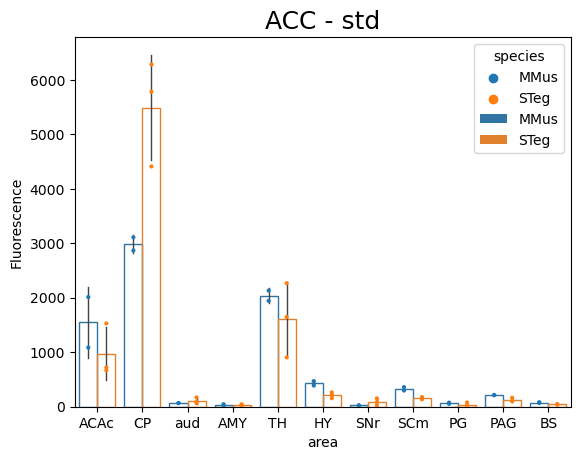

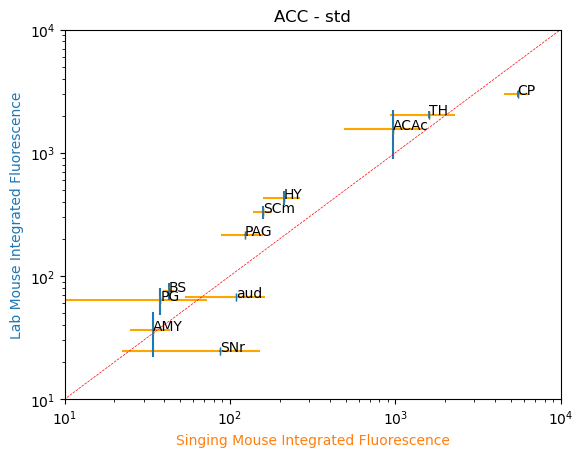

In [50]:

# make dot plot
dot_bar_plot(acc_fluor, title="ACC - std", xaxis="area", yaxis="Fluorescence",
             hueaxis="species", errorbar="sd")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - std", ax_limits=(10,10000), 
                   err="std")
plt.show()

# Normalized by contralateral fluor

In [51]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [ ]:
## OMC

# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, 
                               inj_site="OMC")
omc_fluor


In [72]:
omc_normed = normalize_by_area(omc_fluor, norm_area="OMCc")
omc_normed


/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,area,Fluorescence,Volume_mm3,brain,species,inj_site,normalized_fluorescence
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC,1.000000
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC,2.460964
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC,0.149177
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC,0.075290
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC,1.575755
...,...,...,...,...,...,...,...
61,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC,0.051197
62,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC,0.214941
63,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC,0.048296
64,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC,0.134310


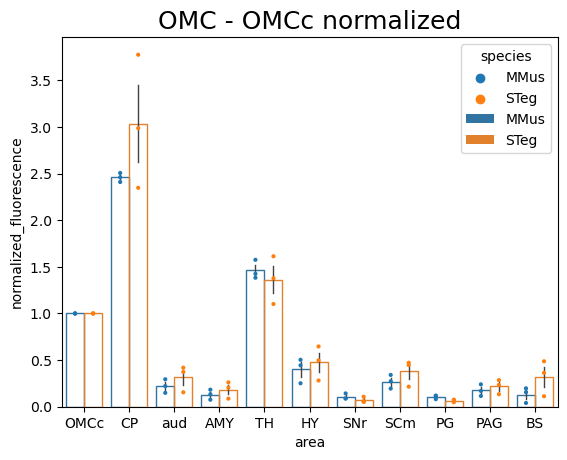

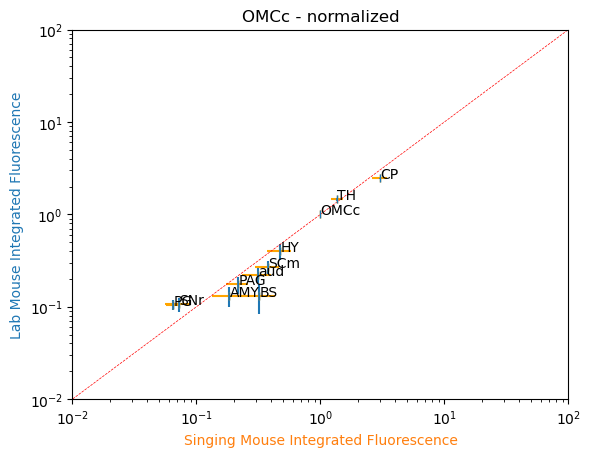

In [79]:

# make dot plot
dot_bar_plot(omc_normed, title="OMC - OMCc normalized", xaxis="area", 
             yaxis="normalized_fluorescence", hueaxis="species")
plt.show()
stvmm_area_scatter(omc_normed, title="OMCc - normalized", ax_limits=(0.01, 100),
                   to_plot="normalized_fluorescence")
plt.show()


In [81]:

## ACC
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")
acc_norm = normalize_by_area(acc_fluor, norm_area="ACAc")
acc_norm

/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

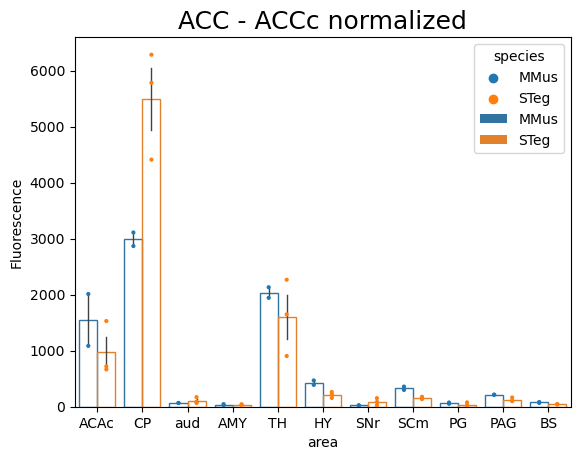

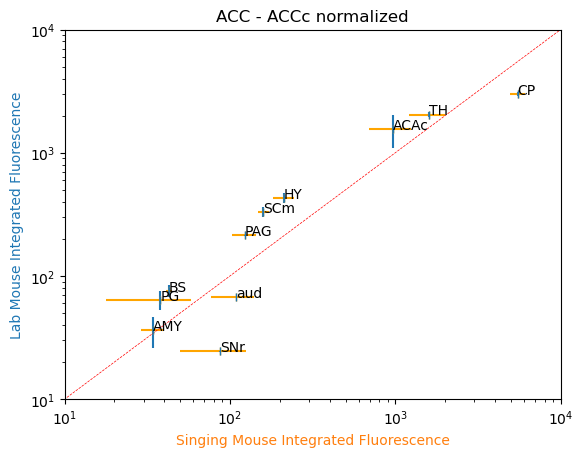

In [85]:

# make dot plot
dot_bar_plot(acc_norm, title="ACC - ACCc normalized", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_norm, title="ACC - ACCc normalized", ax_limits=(10,10000))
plt.show()

# HIP Subtraction

## OMC


In [29]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_norm_subtracted.tif"))



In [43]:
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,4768.73549,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,11936.07811,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,106.02015,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,-48.73762,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,7151.19787,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,145.19222,1055.94,OMC_STeg_220429_b2,STeg,OMC
62,SCm,430.11363,5598.34,OMC_STeg_220429_b2,STeg,OMC
63,PG,193.04856,631.90,OMC_STeg_220429_b2,STeg,OMC
64,PAG,211.65868,3869.04,OMC_STeg_220429_b2,STeg,OMC


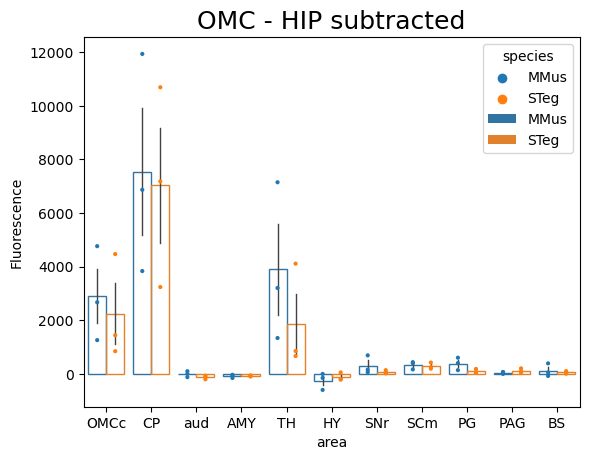

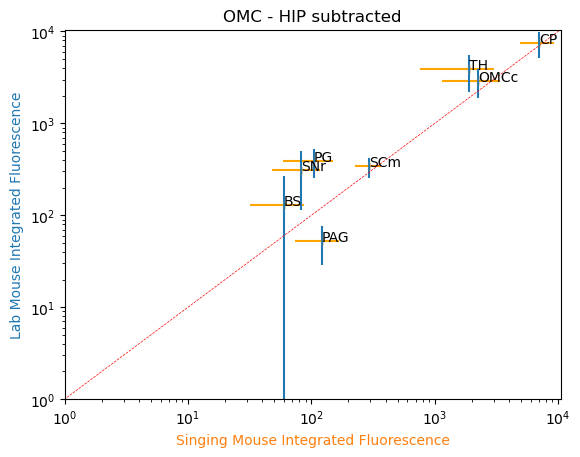

In [44]:

# make dot plot
dot_bar_plot(omc_fluor, title="OMC - HIP subtracted", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()
stvmm_area_scatter(omc_fluor, title="OMC - HIP subtracted", ax_limits=(1,10500))
plt.show()


## ACC

In [37]:

areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")


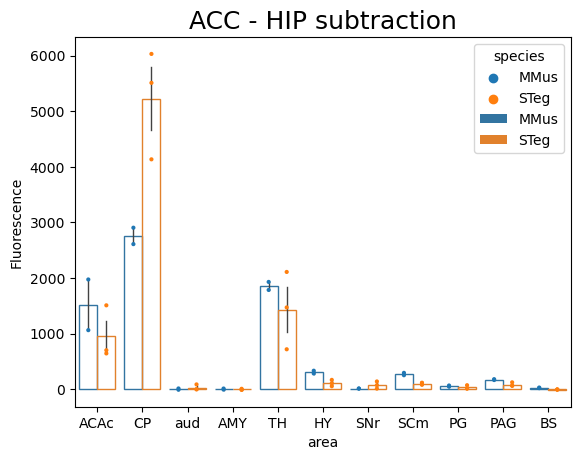

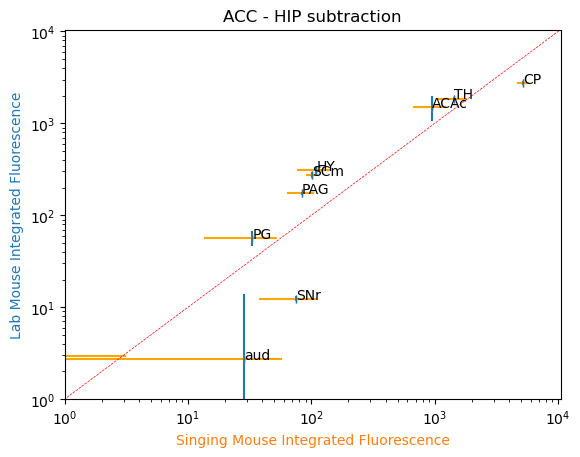

In [41]:

# make dot plot
dot_bar_plot(acc_fluor, title="ACC - HIP subtraction", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - HIP subtraction", ax_limits=(1,10500))
plt.show()